**Mathematical Foundations for Computer Vision and Machine Learning**

***Assignment10 - Multi Label Classifier***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment10)

# Setting Up

We should get ready to read mnist files. 

**Careful! It's really huge!** You should have enough free memory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images

# Functions

Theres some funtions implemented below.

We should normalize the input data to get rid of bias.

We are implementing binary classifier, so if label is 0, it is the answer. Otherwise, it isn't.

In [2]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# return 1 only if the value is what we are looking for. Otherwise -1.
#
def bi_partitioning(M,val):
    length = len(M)
    res = np.zeros((length))
    for i in range(length):
        if(M[i] == val):
            res[i] = 1
        else:
            res[i] = -1
    return res

#
# sign funtion
#
# def sign(x):
#     if(x>=0):
#         return 1
#     else:
#         return -1
    

# Feature Function

We define a feature function ```featureOf``` with varying ```p```. 

$$ \theta_{1}f_{1}(x_{1}) + \theta_{2}f_{2}(x_{1}) + \cdots + \theta_{p}f_{p}(x_{1}) = y_{1} $$
$$ \theta_{1}f_{1}(x_{2}) + \theta_{2}f_{2}(x_{2}) + \cdots + \theta_{p}f_{p}(x_{2}) = y_{2} $$
$$ \theta_{1}f_{1}(x_{3}) + \theta_{2}f_{2}(x_{3}) + \cdots + \theta_{p}f_{p}(x_{3}) = y_{3} $$
$$ \vdots $$
$$ \theta_{1}f_{1}(x_{n}) + \theta_{2}f_{2}(x_{n}) + \cdots + \theta_{p}f_{p}(x_{1}) = y_{n} $$

We can write this as matmul.
$$ \begin{pmatrix} f_{1}(x_{1}) & \cdots & f_{p}(x_{1}) \\ \vdots &\ddots & \vdots \\ f_{1}(x_{n}) & \cdots & f_{p}(x_{n}) \end{pmatrix} 
\begin{pmatrix} \theta_{1} \\ \vdots \\ \theta_{p} \end{pmatrix} 
= \begin{pmatrix} y_{1} \\ \vdots \\ y_{n}  \end{pmatrix}$$

Let's say that left tall matrix as ```A```. Then,
$$ A =  \begin{pmatrix} f_{1}(x_{1}) & \cdots & f_{p}(x_{1}) \\ \vdots &\ddots & \vdots \\ f_{1}(x_{n}) & \cdots & f_{p}(x_{n}) \end{pmatrix} = \begin{pmatrix} r_{1}^{T}x_{1} & \cdots & r_{p}^{T}x_{1} \\ \vdots &\ddots & \vdots \\ r_{1}^{T}x_{n} & \cdots & r_{p}^{T}x_{n} \end{pmatrix} = \begin{pmatrix}\begin{pmatrix} r_{1}^{T} \\ \vdots \\ r_{p}^{T}\end{pmatrix} \begin{pmatrix}x_{1}  \cdots x_{n}\end{pmatrix}\end{pmatrix}^{T}$$

We can easily implement this feature funtion by using ```R``` where,

$$ R =  \begin{pmatrix} r_{1}^{T} \\ \vdots \\ r_{p}^{T}\end{pmatrix}$$

We can derive theta from equation above by pseudo inverse.
$$ \theta = \left( A^{T}A\right)^{-1}A^{T}B $$

In [3]:
R = np.zeros((size_row*size_col,size_row*size_col))
for i in range(size_row*size_col):
    R[i] = np.random.normal(0,1,size=size_row*size_col)
print(R)


def featureOf(x, p):
    r=np.zeros((size_row*size_col,size_row*size_col))
    for i in range(p):
        r[i] = R[i]
    return np.dot(r,x)



[[ 1.30753675  1.06463152 -0.48503714 ...  0.38958957  0.6684108
   0.10237287]
 [ 0.60417578 -0.97791782 -1.40841768 ... -0.12767334 -0.58580757
  -0.36029773]
 [-1.32004625 -0.20518121 -0.71736657 ... -0.28181791  0.68254198
  -1.27076844]
 ...
 [-1.17055222  1.23554408  1.19101215 ... -0.15641713 -1.82327463
   0.44792604]
 [ 0.70534712  0.26955582 -0.03605012 ... -0.29503851  0.30019764
  -1.11800347]
 [-1.97782012 -0.94181408 -0.8965115  ...  1.50050599 -0.13383815
  -0.4268819 ]]


# Vectorize the Input Data

We should get first element of MNIST data to get label.

The real image data starts from second element.

In [4]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)
list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector   

    count += 1
    
count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# Bi-partitioning for Multi-Labeled Images

To train bi-partitioning moel with multi labeled images, we should have various B matrix that is bi-patitioned by each class.

In [5]:
B = []
num_vectorized = size_col*size_row
num_class = 10
num_p = 10

for k in range(num_class):
    B.append(np.matrix(np.transpose(bi_partitioning(list_label_train,k))))   # (60000, 1)

# To make it Linearly Indepent

We should erase **zero column** from the input data. This makes Matrix A as **dependent**, which makes impossible to get **pseudo inverse**.

This means that in theta, the **ith value** is **0**. 

$$\theta = [\theta_{1} \theta_{2} \cdots \theta_{784}]$$

$$\theta_{i} = 0$$

We get the **F1 score** of every p between 2^0 ~ 2^9

In [6]:
scores = np.zeros((num_p))# F1 scores
theta = np.zeros((num_p,num_class,num_vectorized))

import pandas as pd

# Varying p
for j in range(num_p):
    p = 2**j
    tr_feature = featureOf(list_image_train, p)
    index = np.where(~tr_feature.any(axis=1))[0]
    A = tr_feature[~np.all(tr_feature == 0, axis=1)]
    A = np.matrix(np.transpose(A))
    
    ts_feature = featureOf(list_image_test, p)
    
    # Training
    for k in range(num_class):
        temp_theta = (A.T * A).I*A.T*B[k].T

        count = 0
        for i in range(num_vectorized):
            if i not in index:
                theta[j][k][i]=temp_theta[count]
                count+=1
        
    # Test
    CM = np.zeros((num_class+1,num_class+1))
    for i in range(num_test):
        pred = np.argmax(theta[j].dot(ts_feature[:,i]))
        answ = list_label_test[i]
        
        CM[answ][pred] += 1
        
    for i in range(10):
        CM[num_class,i] = sum(CM[:,i])
        CM[i,num_class] = sum(CM[i,:])
    CM[num_class][num_class]=sum(sum(CM[:10,:10]))
    display(pd.DataFrame(data=CM,columns=['0','1','2','3','4','5','6','7','8','9','sum'], index=['0','1','2','3','4','5','6','7','8','9','sum']))
    F1 = 0
    
    for i in range(num_class):
        if CM[10][i] == 0:
            prec=0
            rec=0
            F1=0
        else:    
            prec = CM[i][i]/(sum(CM[:10,i]))
            rec = CM[i][i]/(sum(CM[i,:10]))
            F1 += 2*(prec*rec/(prec+rec))
        
    F1 /= num_class
    scores[j] = F1
    print(str(j) + " " + str(prec) + " " + str(rec) + " " + str(F1))


,0,1,2,3,4,5,6,7,8,9,sum
0,903.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,980.0
1,799.0,0.0,336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.0
2,534.0,0.0,498.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1032.0
3,836.0,0.0,174.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1010.0
4,701.0,0.0,281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,982.0
5,782.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,892.0
6,658.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,958.0
7,816.0,0.0,212.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1028.0
8,586.0,0.0,388.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,974.0
9,857.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1009.0


0 0 0 0.0


,0,1,2,3,4,5,6,7,8,9,sum
0,692.0,0.0,73.0,212.0,0.0,0.0,3.0,0.0,0.0,0.0,980.0
1,356.0,0.0,308.0,452.0,0.0,0.0,19.0,0.0,0.0,0.0,1135.0
2,174.0,0.0,465.0,384.0,0.0,0.0,9.0,0.0,0.0,0.0,1032.0
3,277.0,0.0,160.0,570.0,0.0,0.0,3.0,0.0,0.0,0.0,1010.0
4,292.0,0.0,256.0,421.0,0.0,0.0,13.0,0.0,0.0,0.0,982.0
5,515.0,0.0,93.0,272.0,0.0,0.0,12.0,0.0,0.0,0.0,892.0
6,475.0,0.0,261.0,191.0,0.0,0.0,31.0,0.0,0.0,0.0,958.0
7,364.0,0.0,193.0,465.0,0.0,0.0,6.0,0.0,0.0,0.0,1028.0
8,166.0,0.0,374.0,430.0,0.0,0.0,4.0,0.0,0.0,0.0,974.0
9,507.0,0.0,142.0,354.0,0.0,0.0,6.0,0.0,0.0,0.0,1009.0


1 0 0 0.0


,0,1,2,3,4,5,6,7,8,9,sum
0,663.0,28.0,56.0,68.0,54.0,0.0,55.0,12.0,44.0,0.0,980.0
1,130.0,731.0,37.0,166.0,37.0,0.0,0.0,4.0,30.0,0.0,1135.0
2,114.0,122.0,248.0,229.0,107.0,0.0,58.0,9.0,145.0,0.0,1032.0
3,139.0,138.0,66.0,516.0,71.0,0.0,7.0,17.0,56.0,0.0,1010.0
4,167.0,19.0,70.0,108.0,567.0,0.0,30.0,12.0,9.0,0.0,982.0
5,409.0,84.0,77.0,110.0,68.0,0.0,48.0,40.0,56.0,0.0,892.0
6,326.0,84.0,107.0,59.0,137.0,0.0,187.0,23.0,35.0,0.0,958.0
7,192.0,139.0,42.0,486.0,57.0,0.0,1.0,38.0,73.0,0.0,1028.0
8,133.0,176.0,190.0,223.0,88.0,0.0,15.0,5.0,144.0,0.0,974.0
9,372.0,140.0,52.0,174.0,193.0,0.0,28.0,6.0,44.0,0.0,1009.0


2 0 0 0.0


,0,1,2,3,4,5,6,7,8,9,sum
0,733.0,27.0,33.0,37.0,22.0,0.0,51.0,27.0,34.0,16.0,980.0
1,71.0,855.0,7.0,67.0,75.0,0.0,2.0,15.0,39.0,4.0,1135.0
2,103.0,201.0,254.0,149.0,47.0,0.0,42.0,93.0,118.0,25.0,1032.0
3,113.0,186.0,56.0,328.0,59.0,0.0,12.0,149.0,93.0,14.0,1010.0
4,51.0,80.0,23.0,26.0,608.0,0.0,22.0,97.0,23.0,52.0,982.0
5,350.0,156.0,61.0,51.0,73.0,0.0,61.0,79.0,44.0,17.0,892.0
6,263.0,113.0,29.0,19.0,75.0,0.0,353.0,33.0,52.0,21.0,958.0
7,23.0,112.0,26.0,43.0,57.0,0.0,0.0,730.0,16.0,21.0,1028.0
8,89.0,186.0,46.0,60.0,86.0,0.0,49.0,122.0,318.0,18.0,974.0
9,93.0,146.0,5.0,30.0,257.0,0.0,29.0,315.0,28.0,106.0,1009.0


3 0.36054421768707484 0.10505450941526263 0.15187020790211117


,0,1,2,3,4,5,6,7,8,9,sum
0,832.0,12.0,14.0,35.0,27.0,14.0,16.0,5.0,17.0,8.0,980.0
1,2.0,1069.0,13.0,29.0,3.0,0.0,1.0,5.0,13.0,0.0,1135.0
2,80.0,219.0,363.0,103.0,52.0,5.0,43.0,87.0,57.0,23.0,1032.0
3,27.0,77.0,26.0,706.0,21.0,24.0,3.0,83.0,40.0,3.0,1010.0
4,11.0,40.0,9.0,19.0,723.0,15.0,42.0,35.0,25.0,63.0,982.0
5,100.0,64.0,24.0,181.0,71.0,257.0,46.0,54.0,72.0,23.0,892.0
6,131.0,75.0,41.0,4.0,67.0,46.0,504.0,16.0,38.0,36.0,958.0
7,13.0,103.0,33.0,33.0,25.0,1.0,2.0,802.0,7.0,9.0,1028.0
8,36.0,115.0,22.0,134.0,50.0,53.0,35.0,72.0,438.0,19.0,974.0
9,48.0,94.0,14.0,25.0,279.0,27.0,40.0,153.0,61.0,268.0,1009.0


4 0.5929203539823009 0.26560951437066405 0.5689789724182772


,0,1,2,3,4,5,6,7,8,9,sum
0,897.0,1.0,9.0,7.0,4.0,6.0,36.0,7.0,7.0,6.0,980.0
1,0.0,1102.0,7.0,8.0,4.0,0.0,7.0,2.0,5.0,0.0,1135.0
2,50.0,135.0,499.0,47.0,60.0,2.0,91.0,61.0,57.0,30.0,1032.0
3,16.0,45.0,23.0,812.0,9.0,21.0,10.0,40.0,26.0,8.0,1010.0
4,4.0,47.0,11.0,19.0,748.0,3.0,45.0,29.0,20.0,56.0,982.0
5,57.0,54.0,18.0,198.0,26.0,350.0,59.0,30.0,77.0,23.0,892.0
6,54.0,18.0,18.0,1.0,16.0,10.0,826.0,3.0,6.0,6.0,958.0
7,9.0,57.0,27.0,11.0,26.0,0.0,5.0,868.0,3.0,22.0,1028.0
8,41.0,88.0,35.0,98.0,15.0,36.0,43.0,49.0,545.0,24.0,974.0
9,31.0,70.0,10.0,43.0,191.0,16.0,16.0,144.0,38.0,450.0,1009.0


5 0.72 0.44598612487611494 0.6920586234114736


,0,1,2,3,4,5,6,7,8,9,sum
0,913.0,0.0,7.0,2.0,1.0,8.0,30.0,4.0,15.0,0.0,980.0
1,0.0,1082.0,12.0,8.0,2.0,1.0,5.0,1.0,22.0,2.0,1135.0
2,31.0,77.0,732.0,27.0,31.0,0.0,43.0,26.0,58.0,7.0,1032.0
3,12.0,27.0,26.0,852.0,7.0,20.0,11.0,22.0,25.0,8.0,1010.0
4,6.0,32.0,15.0,4.0,807.0,3.0,21.0,14.0,13.0,67.0,982.0
5,38.0,20.0,11.0,130.0,16.0,508.0,42.0,25.0,75.0,27.0,892.0
6,23.0,11.0,12.0,4.0,22.0,9.0,870.0,1.0,3.0,3.0,958.0
7,3.0,52.0,24.0,3.0,25.0,0.0,3.0,871.0,6.0,41.0,1028.0
8,28.0,58.0,28.0,51.0,21.0,23.0,29.0,22.0,682.0,32.0,974.0
9,16.0,17.0,10.0,16.0,99.0,3.0,5.0,81.0,8.0,754.0,1009.0


6 0.8012752391073327 0.7472745292368682 0.8015174894840793


,0,1,2,3,4,5,6,7,8,9,sum
0,929.0,0.0,5.0,2.0,2.0,5.0,23.0,2.0,10.0,2.0,980.0
1,0.0,1096.0,5.0,3.0,1.0,2.0,5.0,1.0,21.0,1.0,1135.0
2,24.0,72.0,792.0,22.0,16.0,1.0,25.0,25.0,48.0,7.0,1032.0
3,7.0,22.0,25.0,869.0,3.0,20.0,14.0,22.0,17.0,11.0,1010.0
4,1.0,25.0,7.0,0.0,859.0,0.0,12.0,4.0,15.0,59.0,982.0
5,19.0,15.0,16.0,107.0,23.0,558.0,34.0,25.0,76.0,19.0,892.0
6,17.0,12.0,9.0,1.0,26.0,12.0,874.0,1.0,6.0,0.0,958.0
7,3.0,41.0,23.0,9.0,22.0,0.0,3.0,883.0,1.0,43.0,1028.0
8,20.0,58.0,8.0,38.0,25.0,25.0,30.0,16.0,736.0,18.0,974.0
9,20.0,14.0,6.0,15.0,69.0,4.0,3.0,59.0,11.0,808.0,1009.0


7 0.8347107438016529 0.800792864222002 0.8363963855554873


,0,1,2,3,4,5,6,7,8,9,sum
0,936.0,0.0,3.0,1.0,1.0,9.0,17.0,2.0,9.0,2.0,980.0
1,0.0,1102.0,5.0,1.0,1.0,0.0,5.0,1.0,19.0,1.0,1135.0
2,17.0,58.0,809.0,25.0,13.0,1.0,34.0,25.0,46.0,4.0,1032.0
3,5.0,17.0,25.0,879.0,3.0,15.0,10.0,24.0,22.0,10.0,1010.0
4,1.0,23.0,9.0,0.0,870.0,1.0,9.0,1.0,11.0,57.0,982.0
5,21.0,14.0,7.0,94.0,19.0,595.0,30.0,23.0,69.0,20.0,892.0
6,18.0,9.0,9.0,0.0,21.0,16.0,876.0,0.0,9.0,0.0,958.0
7,5.0,36.0,18.0,9.0,16.0,0.0,2.0,886.0,2.0,54.0,1028.0
8,14.0,54.0,10.0,31.0,28.0,43.0,17.0,13.0,739.0,25.0,974.0
9,16.0,12.0,5.0,16.0,70.0,2.0,2.0,62.0,9.0,815.0,1009.0


8 0.8248987854251012 0.8077304261645193 0.8472444005984867


,0,1,2,3,4,5,6,7,8,9,sum
0,941.0,0.0,2.0,3.0,0.0,8.0,15.0,2.0,7.0,2.0,980.0
1,0.0,1106.0,2.0,2.0,2.0,1.0,5.0,2.0,15.0,0.0,1135.0
2,19.0,59.0,804.0,27.0,17.0,0.0,43.0,20.0,38.0,5.0,1032.0
3,4.0,15.0,26.0,889.0,2.0,13.0,9.0,21.0,19.0,12.0,1010.0
4,0.0,23.0,6.0,2.0,871.0,4.0,10.0,2.0,13.0,51.0,982.0
5,19.0,16.0,3.0,85.0,18.0,626.0,23.0,13.0,68.0,21.0,892.0
6,18.0,9.0,11.0,0.0,21.0,17.0,872.0,0.0,10.0,0.0,958.0
7,5.0,40.0,15.0,6.0,21.0,0.0,2.0,875.0,5.0,59.0,1028.0
8,16.0,52.0,10.0,31.0,26.0,40.0,16.0,12.0,749.0,22.0,974.0
9,18.0,10.0,3.0,14.0,73.0,0.0,1.0,76.0,11.0,803.0,1009.0


9 0.8235897435897436 0.7958374628344896 0.8507347319237276


# Find the Best P among the results

The whole f1 scores are stored in ```scores```. 

We can find the index of it by ```np.argmax``` function.

If there was no 

Best p = 512
0.8507347319237276


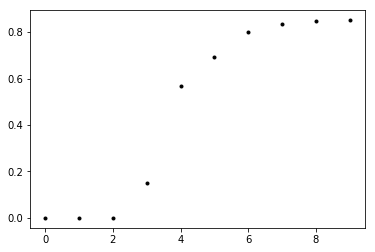

In [7]:
x = range(num_p)
plt.plot(x,scores,'k.')

print("Best p = " + str(2**np.argmax(scores)))
print(max(scores))

# Average Image of Each Table Value

While classifing data with best p, I also calculated average image of each class.

Average image of each one is plotted.

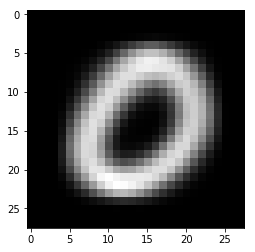

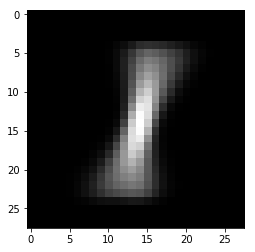

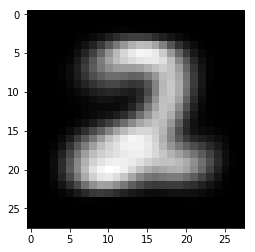

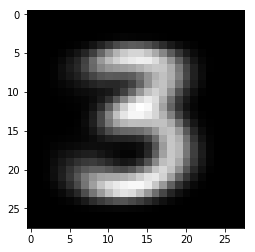

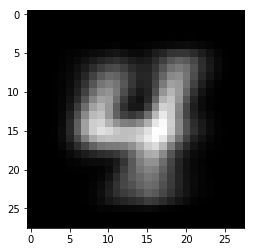

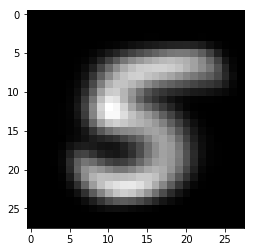

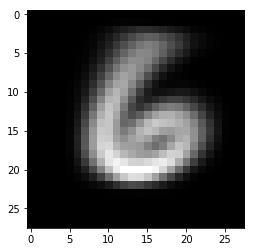

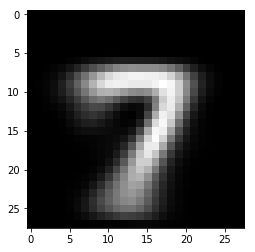

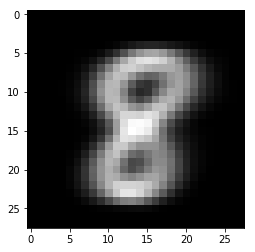

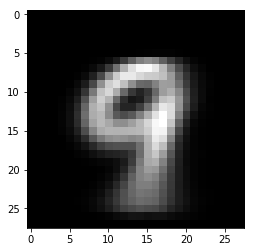

In [8]:
best = np.argmax(scores)
m = 2**np.argmax(scores)

im_avg = np.zeros((num_class, num_class, size_row*size_col))
feature = featureOf(list_image_test, m)
CM = np.zeros((num_class,num_class))

for i in range(num_test):
    pred = np.argmax(theta[best].dot(feature[:,i]))
    answ = list_label_test[i]
    CM[answ][answ] += 1
    im_avg[pred][answ] += list_image_test[:,i]

for i in range(num_class):
    im_avg[i][i] /= CM[i][i]


for i in range(num_class):
    plt.imshow(im_avg[i][i].reshape((size_row,size_col)),cmap='gray')
    plt.show()